# importing module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# defining function

In [2]:
def load_data(l):
    data=np.array(pd.read_csv(l,delimiter=",",skiprows=1))
    X = data[:,1:]
    Y = data[:,0]
    return (X,Y)
def split(X,Y,s):
    m=X.shape[0]
    a=math.ceil(s*m)
    return(X[:a],Y[:a],X[a:],Y[a:])

def normalise(X):
    mu=np.mean(X, axis=0)
    sigma=np.std(X, axis=0)
    X_n=(X-mu)/sigma
    return X_n

def regression(X,w,b):
    if X.ndim!=1:
        p_wb=X @ w + b
    else:
        p_wb=X*w+b
    return p_wb

def cost_function(X,Y,w,b,regression,lambda_):
    p_wb = regression(X,w,b)
    m = X.shape[0]
    cost_wb = (1/(2*m)) * np.sum((p_wb-Y)**2)
    cost_wb_r = cost_wb + ((lambda_/(2*m)) * ((np.sum(w))**2))
    return cost_wb
               
def gradient(X,Y,w,b,regression, lambda_):
    p_wb = regression(X,w,b)
    n = X.shape[1]
    m = X.shape[0]
    g_b = 0
    e = (p_wb-Y)
    g_b = (1/m) * np.sum(e)        
    g_w = (1/m) * (X.T @ e)
    for j in range(n):
        g_w[j] = g_w[j] + (lambda_/m) * w[j]
    return g_w,g_b
               
def gradient_descent(X,Y,w,b,alpha,steps,cost_function,gradient,lambda_):
    cost=[]
    w_b=[]
    b=b
    i_list=[]
    for i in range(steps):
        i_list.append(i+1)
        g_w, g_b = gradient(X,Y,w,b,regression,lambda_)
        w=w-alpha*g_w
        b=b-alpha*g_b
        cst = cost_function(X, Y, w, b, regression,lambda_)
        cost.append(cst)
        if i % math.ceil(steps/10) == 0:
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w,b ,cost,i_list     

def plot(cost,i_list):
    plt.plot(i_list,cost,c="r",label="cost")
    plt.title("cost vs iteration")
    plt.xlabel(f"iteration")
    plt.ylabel("cost")
    plt.legend()
    plt.show()
    
def plot_data(X, Y, p):
    fig, axs = plt.subplots(5, 4, figsize=(12, 20), sharey=True)    
    for k in range(X.shape[1]):
        axs[k // 4, k % 4].scatter(X[:, k], Y, c="r", marker='x', label="true", s=12)
        axs[k // 4, k % 4].scatter(X[:, k], p, c="b", marker='o', label="predicted", s=1)
        axs[k // 4, k % 4].set_xlabel(f"Feature {k}")
        axs[k // 4, k % 4].legend()
    plt.ylabel("Target values")
    plt.tight_layout()
    plt.show()
    
def r2score(y,f_wb):
    mu=np.mean(y,axis=0)
    r2=1-((np.sum((y-f_wb)**2))/(np.sum((y-mu)**2)))
    return r2

In [3]:
X,Y=load_data("Lineardata_train.csv")

In [4]:
X_new=normalise(X)
X_train,Y_train,X_cv,Y_cv = split(X_new,Y,0.3)

In [5]:
print(f"max in original :{np.max(X)}, min in original  :{np.min(X)}")  
print(f"max in normalized :{np.max(X_new)}, min in normalized  :{np.min(X_new)}")    

max in original :993.6949441473038, min in original  :-1031.0753603448304
max in normalized :4.914440656132148, min in normalized  :-5.113829819414237


In [6]:
w=np.zeros((X.shape[1],))
b=0

# train the model

In [7]:

print(f"alpha: {0.1} No. of iteration: {200}")
print()
w_final,b_final,cost_train,i_list=gradient_descent(X_train,Y_train,w,b,0.1,200,cost_function,gradient,0)
print()
p_train=regression(X_train,w_final,b_final)

alpha: 0.1 No. of iteration: 200

Iteration         0, Cost: 5.26791e+07
Iteration        20, Cost: 8.08368e+05
Iteration        40, Cost: 1.26922e+04
Iteration        60, Cost: 2.03288e+02
Iteration        80, Cost: 3.31705e+00
Iteration       100, Cost: 5.98178e-02
Iteration       120, Cost: 5.97713e-03
Iteration       140, Cost: 5.07583e-03
Iteration       160, Cost: 5.06058e-03
Iteration       180, Cost: 5.06032e-03



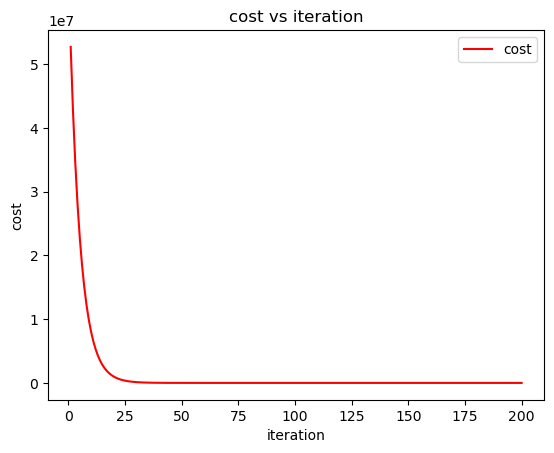

In [8]:
plot(cost_train,i_list)

# cross validating

In [9]:
cost_n=cost_function(X_cv,Y_cv,w_final,b_final,regression,0)
print(f"cost by cross validing the data: {cost_n}")
p_cv=regression(X_cv,w_final,b_final)
r2score= r2score(Y_cv,p_cv)
print(f"r2score: {r2score}")

cost by cross validing the data: 0.005050128218935684
r2score: 0.9999999999232125


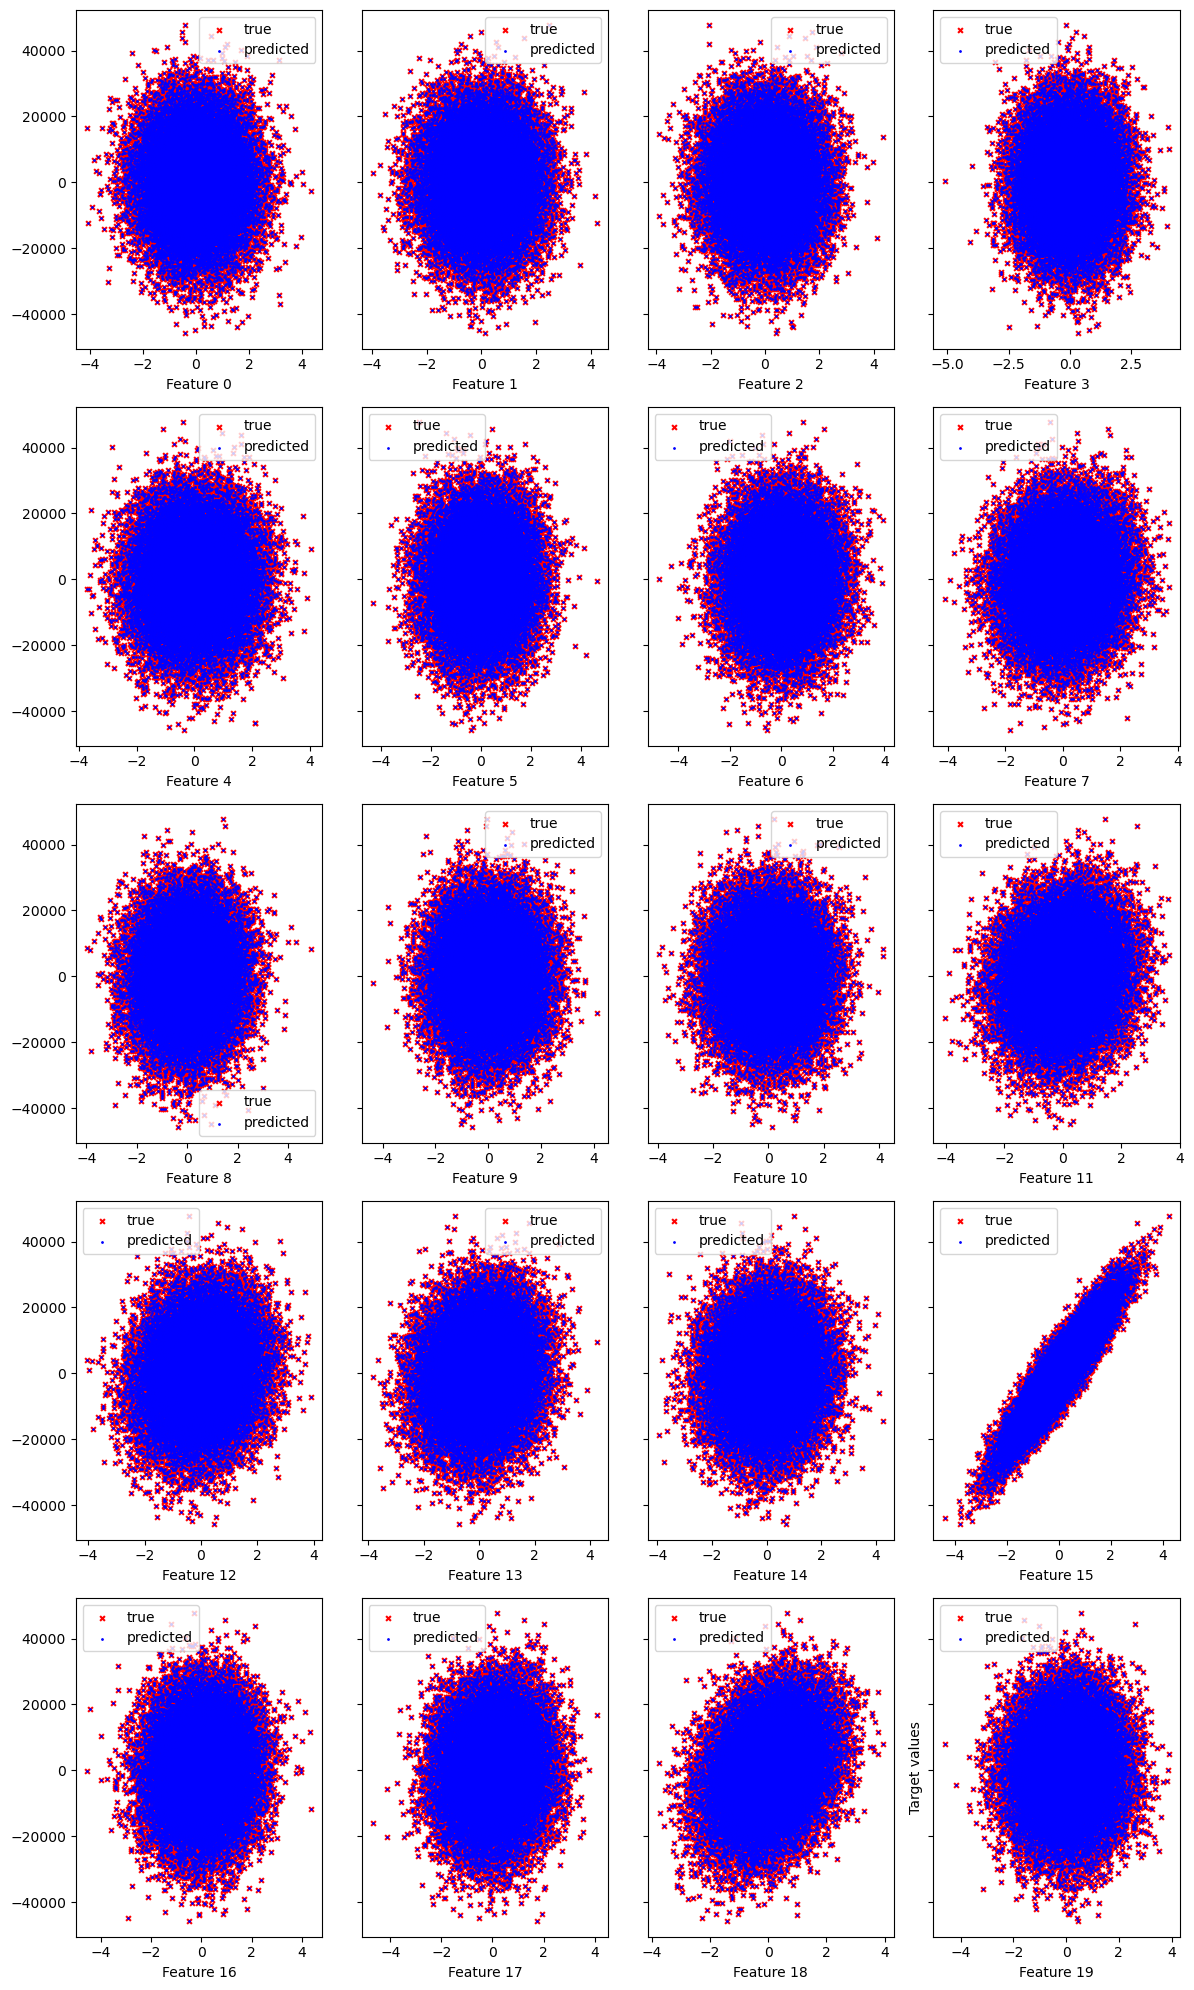

In [10]:
plot_data(X_cv,Y_cv,p_cv)

# testing

In [11]:
X_test,Y_id=load_data("Lineardata_test.csv")
X=normalise(X_test)
p_test = regression(X,w_final,b_final)
np.savetxt('linear_test_prediction.csv', p_test, delimiter=',', header=' Test target', comments='')